In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to read RTTM file
def read_rttm(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if parts[0] == "SPEAKER":  # Ensure it's a speaker segment
                start_time = float(parts[3])
                duration = float(parts[4])
                speaker = parts[7]
                end_time = start_time + duration
                data.append((start_time, end_time, speaker))
    return pd.DataFrame(data, columns=["Start", "End", "Speaker"])

# Load RTTM file
pyannote_df = read_rttm("outputs/pyannote_test.rttm")
reverb_df = read_rttm("outputs/reverb_test.rttm")

# Function to read RTTM file
def read_rttm_nemo(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if parts[0] == "SPEAKER":  # Ensure it's a speaker segment
                start_time = float(parts[1])
                duration = float(parts[2])
                speaker = parts[5]
                end_time = start_time + duration
                data.append((start_time, end_time, speaker))
    return pd.DataFrame(data, columns=["Start", "End", "Speaker"])

# Load RTTM file
pyannote_df = read_rttm("outputs/pyannote_test.rttm")
reverb_df = read_rttm("outputs/reverb_test.rttm")
nemo_df = read_rttm_nemo("outputs/nemo_test.rttm")

print(pyannote_df.head())
print()
print(reverb_df.head())
print()
print(nemo_df.head())

   Start     End     Speaker
0  0.031   0.740  SPEAKER_14
1  1.330   2.106  SPEAKER_14
2  2.849   3.423  SPEAKER_14
3  4.621   8.232  SPEAKER_14
4  8.401  12.012  SPEAKER_14

    Start     End     Speaker
0   0.013  63.013  SPEAKER_03
1  15.992  16.012  SPEAKER_16
2  16.992  17.012  SPEAKER_16
3  17.992  18.012  SPEAKER_16
4  18.992  19.012  SPEAKER_16

    Start     End    Speaker
0   0.000  14.810  speaker_4
1  15.020  15.395  speaker_0
2  15.395  20.145  speaker_3
3  20.145  23.370  speaker_0
4  23.580  33.530  speaker_4


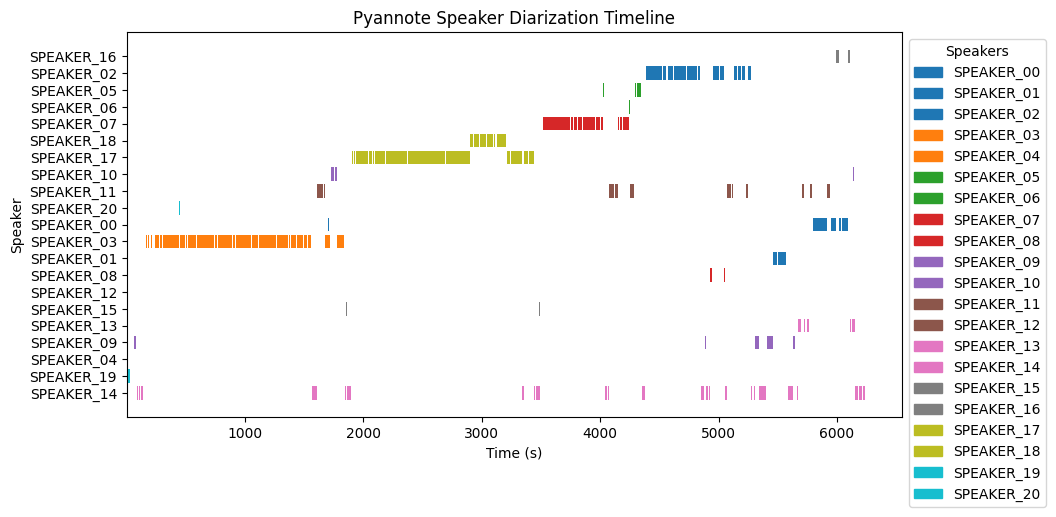

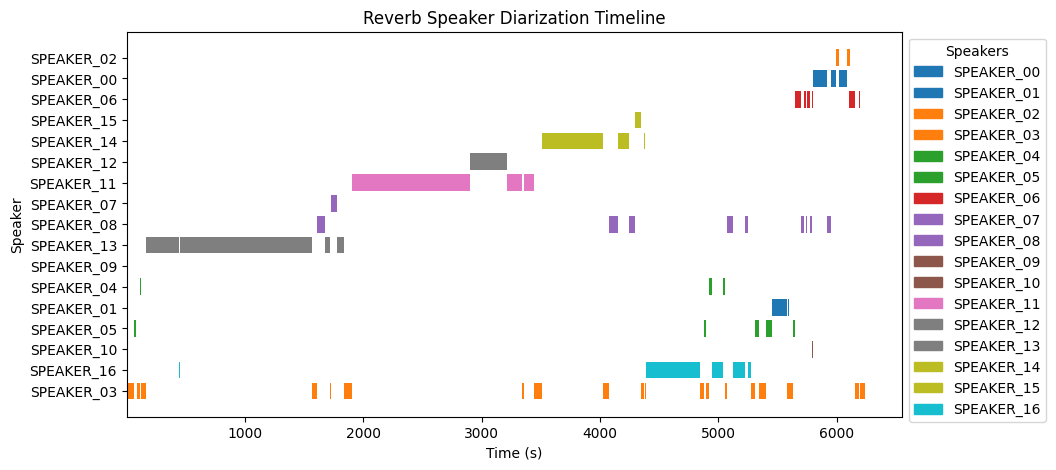

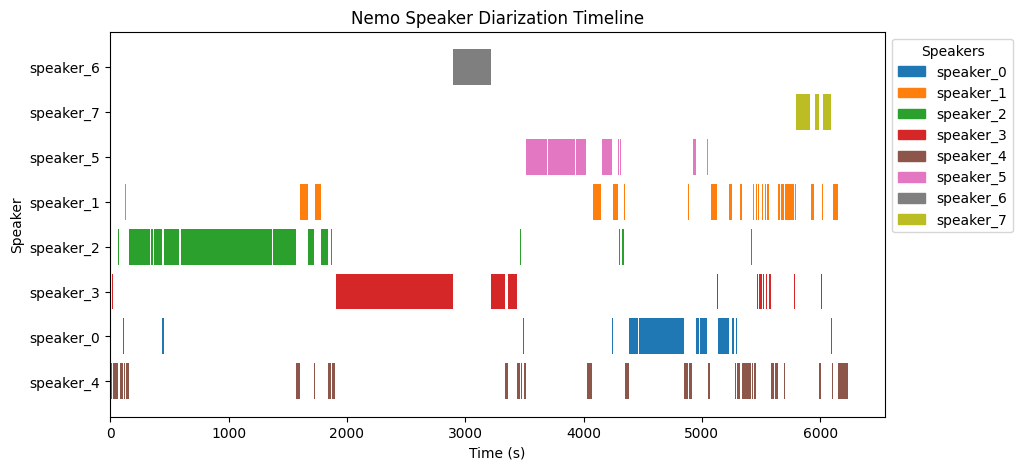

In [9]:
import matplotlib.patches as mpatches

def plot_rttm(df, title = 'Speaker Diarization Timeline'):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Get unique speakers and assign colors
    speakers = sorted(df["Speaker"].unique())
    speaker_colors = {spk: plt.cm.tab10(i / len(speakers)) for i, spk in enumerate(speakers)}

    # Plot each speaker segment
    for _, row in df.iterrows():
        ax.barh(row["Speaker"], row["End"] - row["Start"], left=row["Start"], color=speaker_colors[row["Speaker"]])

    # Labels and Formatting
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Speaker")
    ax.set_title(title)
    
    # Create legend
    patches = [mpatches.Patch(color=color, label=speaker) for speaker, color in speaker_colors.items()]
    ax.legend(handles=patches, title="Speakers", bbox_to_anchor=(1, 1))

    plt.show()

# Plot RTTM
plot_rttm(pyannote_df, 'Pyannote Speaker Diarization Timeline')
plot_rttm(reverb_df, 'Reverb Speaker Diarization Timeline')
plot_rttm(nemo_df, 'Nemo Speaker Diarization Timeline')